# Data Cleaning Lecture Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the tips dataset from seaborn
df = sns.load_dataset("tips")

In [3]:
df.shape

(244, 7)

In [4]:
df.head(10)
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# 1. Handling Missing Data

In [5]:
# Creat a copy of the dataset and introduce missing values
df_missing = df.copy()
df_missing.loc[np.random.choice(df.index, 10), "total_bill"] = np.nan
df_missing.loc[np.random.choice(df.index, 10), "sex"] = np.nan

df_missing.shape

(244, 7)

In [6]:
# IIdentify missing values
df_missing.isnull().sum()

total_bill    10
tip            0
sex           10
smoker         0
day            0
time           0
size           0
dtype: int64

In [7]:
# Deletion: Remove records with missing values
df_deleted = df_missing.dropna()
df_deleted.shape

(224, 7)

In [8]:
# Simple Imputation: Fill missing values with mean for numeric columns and
# columns
df_imputed = df_missing.copy()
df_imputed["total_bill"] = df_imputed["total_bill"].fillna(
    df_imputed["total_bill"].mean()
)
df_imputed["sex"] = df_imputed["sex"].fillna(
    df_imputed["sex"].mode()[0]
)  # question here

df_imputed.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
# Advanced imputation: knn Imputation
from sklearn.impute import KNNImputer

# Creat a copy of the dataset for KNN imputation
df_imputed_knn = df_missing.copy()

# initialize and fit the knn imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed_knn[["total_bill", "tip", "size"]] = imputer.fit_transform(
    df_imputed_knn[["total_bill", "tip", "size"]]
)

# 2. Dealing with Duplicates

In [10]:
df_duplicates = pd.concat([df, df.sample(5)], ignore_index=True)  # question here
df_duplicates.shape

(249, 7)

In [11]:
# Identify duplicate records
df_duplicates.duplicated().sum()

6

In [12]:
# Show all duplicated rows
df_duplicates[df_duplicates.duplicated(keep="last")]

,total_bill,tip,sex,smoker,day,time,size
40,16.04,2.24,Male,No,Sat,Dinner,3
160,21.50,3.50,Male,No,Sun,Dinner,4
195,7.56,1.44,Male,No,Thur,Lunch,2
198,13.00,2.00,Female,Yes,Thur,Lunch,2
202,13.00,2.00,Female,Yes,Thur,Lunch,2
217,11.59,1.50,Male,Yes,Sat,Dinner,2


In [13]:
# Romove duplicate records
df_deplicated = df_duplicates.drop_duplicates()

df_duplicates.shape

(249, 7)

# 3. Data Formatting and Standardization

In [14]:
# Standarize text case for 'sex' and 'smoker' columns
# The title() method returns a string
# where the first character in every word is upper case.
df["sex"] = df["sex"].str.upper()
df["smoker"] = df["smoker"].str.title()

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,FEMALE,No,Sun,Dinner,2
1,10.34,1.66,MALE,No,Sun,Dinner,3
2,21.01,3.50,MALE,No,Sun,Dinner,3
3,23.68,3.31,MALE,No,Sun,Dinner,2
4,24.59,3.61,FEMALE,No,Sun,Dinner,4


# 4. Handling Outlliers


<function matplotlib.pyplot.show(close=None, block=None)>

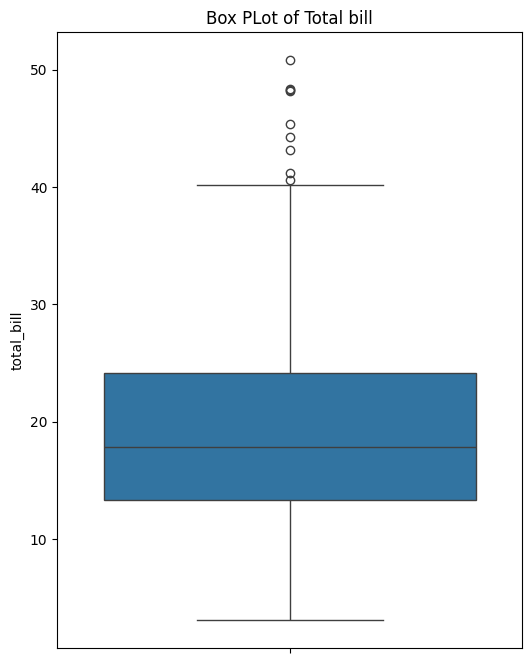

In [15]:
# Identify outlier using a box plot
plt.figure(figsize=(6, 8))
sns.boxplot(y=df["total_bill"])
plt.title("Box PLot of Total bill")
plt.show

In [16]:
!pip3 install scipy

Defaulting to user installation because normal site-packages is not writeable


In [17]:
# Identify outlier using z-score
from scipy import stats

**Watch recording!!!!!!!!!!!!!!!!!!**

# 5. Data Validation

In [22]:
# Data type validation
df.dtypes

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,FEMALE,No,Sun,Dinner,2
1,10.34,1.66,MALE,No,Sun,Dinner,3
2,21.01,3.50,MALE,No,Sun,Dinner,3
3,23.68,3.31,MALE,No,Sun,Dinner,2
4,24.59,3.61,FEMALE,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,MALE,No,Sat,Dinner,3
240,27.18,2.00,FEMALE,Yes,Sat,Dinner,2
241,22.67,2.00,MALE,Yes,Sat,Dinner,2
242,17.82,1.75,MALE,No,Sat,Dinner,2


In [23]:
# Range validation for 'tip' column
df[(df["tip"] < 0)].shape

(0, 7)

In [20]:
df[(df["tip"] > df["total_bill"])]

,total_bill,tip,sex,smoker,day,time,size


In [21]:
df[(df["tip"] < 0) | (df["tip"] > df["total_bill"])]

,total_bill,tip,sex,smoker,day,time,size


In [25]:
# Replace invalid tip values with Nan
df.loc[(df["tip"] < 0) | (df["tip"] > df["total_bill"]), "tip"] = np.nan

In [26]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# 7. Chardet

In [27]:
!pip3 install chardet

Defaulting to user installation because normal site-packages is not writeable


In [30]:
import chardet

In [31]:
byte_string = b"hello,World!"
encoding = chardet.detect(byte_string)
encoding

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

# 6. no
